# WEB SCRAPING

In [182]:
import re
import numpy as np
import pandas as pd

In [183]:
import requests

In [184]:
url = "https://www.magicbricks.com/property-for-rent/residential-real-estate?proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa&cityName=Hyderabad"
response = requests.get(url)
print(response)

<Response [200]>


In [185]:
request_header = {"Content-Type" : "text/html; charset=UTF-8",
                 "User-Agent" : "Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0",
                 "Accept-Encoding" : "gzip, deflate, br"}
page=requests.get(url,headers=request_header)
page

<Response [200]>

In [186]:
from bs4 import BeautifulSoup

In [187]:
soup = BeautifulSoup(page.text, "html.parser")
soup.text

"\n\n\n\n\n\n\n\nFlat for Rent in Hyderabad: 10586+ Flats / Apartments on Rent in Hyderabad\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\xa0BuyPopular ChoicesReady to MoveOwner PropertiesBudget HomesPremium HomesNew Projects NEWProperty TypesFlats in HyderabadHouse for sale in HyderabadVilla in HyderabadProperty in HyderabadAgriculture Land for Sale in HyderabadShop for sale in HyderabadBudgetUnder ₹ 50 Lac₹ 50 Lac - ₹ 1 Cr₹ 1 Cr - ₹ 1.5 CrAbove ₹ 1.5 CrExploreLocalities in HyderabadProjects in HyderabadInvestment HotspotFind an AgentBuying ToolsPropWorthRates & TrendsBuy vs RentTips and GuidesRentPopular ChoicesOwner PropertiesVerified PropertiesFurnished HomesBachelor Friendly HomesImmediately AvailableProperty TypesFlat for rent in HyderabadHouse for rent in HyderabadVilla for rent in HyderabadPG in HyderabadOffice Space in HyderabadHostels in HyderabadRoom for Rent in HyderabadBudgetUnder ₹ 10,000₹ 10,000 - ₹ 15,000₹ 15,000 - ₹ 25,000Above ₹ 25,000ExploreLocalities in HyderabadBuy

In [188]:
elem_with_classes=soup.find_all(class_=True)
unique_classes = set()
for elem in elem_with_classes:
    unique_classes.update(elem["class"])
unique_classes

{'action--single',
 'active',
 'adloc',
 'apple-store',
 'auto-suggest',
 'auto-suggest-web-main-wrap',
 'auto-suggest__drop-wrap',
 'auto-suggest__input',
 'auto-suggest__input-wrap',
 'auto-suggest__tag',
 'auto-suggest__tag-close',
 'auto-suggest__tag-text',
 'auto-suggest__tag-wrap',
 'autosuggest-overlay',
 'back-btn',
 'badge',
 'box-shadow',
 'btn-red',
 'btn-white',
 'clearfix',
 'container',
 'container-fluid',
 'customLazy',
 'divider',
 'drop-call',
 'drop-heading',
 'drop-links',
 'drop-row',
 'facebook',
 'filter-more',
 'filter-overlay',
 'filter__common__component',
 'filter__common__component__item',
 'filter__common__component__item__input',
 'filter__common__component__item__label',
 'filter__common__component__row',
 'filter__common__component__title',
 'filter__component',
 'filter__component__btn',
 'filter__component__cta-done',
 'filter__component__drop-down',
 'filter__component__more-fixed',
 'filter__component__more-fixed__btn-sec',
 'filter__component__more-f

In [189]:
for i in soup.find_all("div", class_="mb-srp__card__container"):
    print(i.text)

20+ PhotosPosted: YesterdayAgent: DharaOperating Since: 1979POPULAR PROJECT4 BHK Villa for Rent in Kokapet, Outer Ring Road HyderabadBabukhan LakefrontFurnishingSemi-FurnishedBathroom4Tenant PreferredBachelorsAvailabilityImmediatelyCarpet Area4000 sqftfacingEastoverlookingGarden/Park, PoolDimensions90 X 3.33 yrd SqyrdBathroom4Balcony4East Facing PropertyExcellent community with luxurious amenities and amazing landscaping. Free from the pollution as no construction possible in all directions. Greatplacetostay. The monthly maintenance is Rs 15000/-.
17+ PhotosPosted: TodayAAni Associates7500+ Buyers Served Know More POPULAR PROJECT4 BHK Flat for Rent in Nalagandla, HyderabadAparna Sarovar ZenithFurnishingSemi-FurnishedBathroom4Tenant PreferredBachelorsAvailabilityImmediatelySuper Area2660 sqftFloor5 out of 26facingEastoverlookingGarden/ParkBathroom4Balcony1East Facing Property4 BHK, Multistorey Apartment is available for Rent in Nalagandla, Hyderabad for 80,000
16+ PhotosPosted: Yesterda

In [190]:
rent = []
for item in soup.find_all("div", class_="mb-srp__card__price--amount"):
    rent.append(item.text.strip())
rent

['₹1.1 Lac',
 '₹80,000',
 '₹50,000',
 '₹22,000',
 '₹1.3 Lac',
 '₹1.3 Lac',
 '₹65,000',
 '₹25,000',
 '₹28,000',
 '₹1.8 Lac',
 '₹65,000',
 '₹70,000',
 '₹2 Lac',
 '₹32,000',
 '₹40,000',
 '₹57,000',
 '₹1.5 Lac',
 '₹36,000',
 '₹75,000',
 '₹59,900',
 '₹35,000',
 '₹1 Lac',
 '₹11,000',
 '₹40,000',
 '₹18,000',
 '₹12,500',
 '₹1 Lac',
 '₹84,000',
 '₹40,000',
 '₹1.3 Lac']

In [191]:
extracted_text = []
h2_tags = soup.find_all("h2", class_="mb-srp__card--title")

if h2_tags:
    for h2_tag in h2_tags:
        extracted_text.append(h2_tag.text.strip())
else:
    extracted_text.append(np.nan)

print(extracted_text)

['4 BHK Villa for Rent in Kokapet, Outer Ring Road Hyderabad', '4 BHK Flat for Rent in Nalagandla, Hyderabad', '3 BHK Flat for Rent in Nalagandla, Hyderabad', '2 BHK Flat for Rent in Kondapur, Hyderabad', '5 BHK Villa for Rent in Kollur, Outer Ring Road Hyderabad', '3 BHK Flat for Rent in Masjid Banda, Hyderabad', '3 BHK Flat for Rent in Shaikpet, Hyderabad', '3 BHK Flat for Rent in Pragathi Nagar, Kukatpally, Hyderabad', '2 BHK Villa for Rent in Tirumalagiri Hyderabad', '3 BHK Flat for Rent in Hitech City, Hyderabad', '3 BHK Flat for Rent in Kondapur, Hyderabad', '3 BHK Flat for Rent in Kokapet, Outer Ring Road, Hyderabad', '4 BHK Villa for Rent in Khajaguda Hyderabad', '3 BHK House for Rent in Defence Colony Sainikpuri Hyderabad', '3 BHK Flat for Rent in Pragathi Enclave, Hyderabad', '3 BHK Flat for Rent in Financial District, Nanakram Guda, Hyderabad', '4 BHK Flat for Rent in Izzathnagar, Hyderabad', '2 BHK Flat for Rent in Basheer Bagh, NH 7, Hyderabad', '3 BHK Villa for Rent in Ch

In [192]:
location= []
pattern = r'in\s+(.+)'
for text in extracted_text:
    match = re.search(pattern, text)
    if match:
        location.append(match.group(1))
location

['Kokapet, Outer Ring Road Hyderabad',
 'Nalagandla, Hyderabad',
 'Nalagandla, Hyderabad',
 'Kondapur, Hyderabad',
 'Kollur, Outer Ring Road Hyderabad',
 'Masjid Banda, Hyderabad',
 'Shaikpet, Hyderabad',
 'Pragathi Nagar, Kukatpally, Hyderabad',
 'Tirumalagiri Hyderabad',
 'Hitech City, Hyderabad',
 'Kondapur, Hyderabad',
 'Kokapet, Outer Ring Road, Hyderabad',
 'Khajaguda Hyderabad',
 'Defence Colony Sainikpuri Hyderabad',
 'Pragathi Enclave, Hyderabad',
 'Financial District, Nanakram Guda, Hyderabad',
 'Izzathnagar, Hyderabad',
 'Basheer Bagh, NH 7, Hyderabad',
 'Chanda Nagar Hyderabad',
 'Narsingi, Outer Ring Road, Hyderabad',
 'Narayanguda, Hyderabad',
 'Gachibowli, Hyderabad',
 'Injapur, Neeladri Nagar, Ibrahimpatnam Road, Hyderabad',
 'Dandamudi Enclave, Jeedimetla, Hyderabad',
 'Hastinapuram Hyderabad',
 'Alwal Hyderabad',
 'Puppalguda, Hyderabad',
 'Gachibowli, Hyderabad',
 'Kokapet, Outer Ring Road, Hyderabad',
 'leke villa Gandipet Hyderabad']

In [193]:
properties = []
pattern = r'^(.*?)\sin\s'
for text in extracted_text:
    match = re.search(pattern, text)
    if match:
        properties.append(match.group(1).strip())
properties

['4 BHK Villa for Rent',
 '4 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '2 BHK Flat for Rent',
 '5 BHK Villa for Rent',
 '3 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '2 BHK Villa for Rent',
 '3 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '4 BHK Villa for Rent',
 '3 BHK House for Rent',
 '3 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '4 BHK Flat for Rent',
 '2 BHK Flat for Rent',
 '3 BHK Villa for Rent',
 '3 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '4 BHK Flat for Rent',
 '2 BHK Flat for Rent',
 '4 BHK Flat for Rent',
 '2 BHK House for Rent',
 '2 BHK House for Rent',
 '3 BHK Flat for Rent',
 '3 BHK Flat for Rent',
 '2 BHK Flat for Rent',
 '5 BHK Villa for Rent']

In [194]:
bathrooms = []
for item in soup.find_all("div", class_="mb-srp__card__summary__list--item"):
    if item.get('data-summary') == 'bathroom':
        bathrooms.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
bathrooms

['4',
 '4',
 '4',
 '4',
 '3',
 '3',
 '2',
 '2',
 '7',
 '7',
 '3',
 '3',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '4',
 '4',
 '3',
 '3',
 '3',
 '3',
 '4',
 '4',
 '4',
 '4',
 '2',
 '2',
 '2',
 '2',
 '4',
 '4',
 '2',
 '2',
 '3',
 '3',
 '2',
 '2',
 '3',
 '3',
 '5',
 '5',
 '2',
 '2',
 '5',
 '5',
 '2',
 '2',
 '2',
 '2',
 '3',
 '3',
 '3',
 '3',
 '2',
 '2',
 '5',
 '5']

In [195]:
availabilities = []
for item in soup.find_all("div", class_="mb-srp__card__summary__list--item"):
    if item.get('data-summary') == 'status':
        availabilities.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
availabilities

['Immediately',
 'Immediately',
 'Immediately',
 "From Aug '24",
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 "From Aug '24",
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 'Immediately',
 "From Aug '24",
 'Immediately']

In [196]:
tenant_preferreds = []
for item in soup.find_all("div", class_="mb-srp__card__summary__list--item"):
    if item.get('data-summary') == 'tenent-preffered':
        tenant_preferreds.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
tenant_preferreds

['Bachelors',
 'Bachelors',
 'Bachelors/Family',
 'Bachelors',
 'Family',
 'Bachelors',
 'Family',
 'Family',
 'Family',
 'Bachelors/Family',
 'Bachelors',
 'Bachelors/Family',
 'Family',
 'Bachelors',
 'Bachelors',
 'Bachelors/Family',
 'Family',
 'Bachelors',
 'Bachelors',
 'Family',
 'Bachelors/Family',
 'Bachelors',
 'Bachelors',
 'Family',
 'Bachelors',
 'Bachelors/Family',
 'Bachelors',
 'Bachelors',
 'Family',
 'Bachelors']

In [197]:
carpet_areas = []
for item in soup.find_all("div", class_="mb-srp__card__summary__list--item"):
    if item.get('data-summary') == 'carpet-area':
        carpet_areas.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
carpet_areas

['4000 sqft',
 '4030 sqft',
 '1700 sqft',
 '1250 sqft',
 '1215 sqft',
 '5000 sqft',
 '2500 sqft',
 '1492 sqft',
 '1800 sqft',
 '900 sqft',
 '2970 sqft',
 '1412 sqft',
 '1900 sqft',
 '3800 sqft',
 '1250 sqft',
 '2800 sqft',
 '1400 sqft',
 '1200 sqft',
 '1650 sqft',
 '960 sqft',
 '4000 sqft']

In [198]:
floors = []
for item in soup.find_all("div", class_="mb-srp__card__summary__list--item"):
    if item.get('data-summary') == 'floor':
        floors.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
floors

['5 out of 26',
 '16 out of 22',
 '1 out of 5',
 '20 out of 20',
 '15 out of 18',
 '4 out of 5',
 '28 out of 39',
 '10 out of 24',
 '27 out of 32',
 'Ground out of 2',
 '1 out of 5',
 '14 out of 34',
 '15 out of 41',
 'Ground out of 5',
 '8 out of 12',
 '4 out of 5',
 'Ground out of 8',
 'Ground out of 2',
 '1 out of 2',
 '1 out of 2',
 '14 out of 14',
 '27 out of 31',
 '3 out of 8']

In [199]:
for i in [location,properties,bathrooms,availabilities,tenant_preferreds,floors,carpet_areas]:
    print(len(i))

30
30
60
30
30
23
21


In [200]:
data = []

for i in range(len(location)):
    data_info = {
        "location": location[i] if i < len(location) else None,
        "properties": properties[i] if i < len(properties) else None,
        "rent": rent[i] if i < len(rent) else None,
        "bathrooms": bathrooms[i] if i < len(bathrooms) else None,
        "availabilities": availabilities[i] if i < len(availabilities) else None,
        "tenant_preferreds": tenant_preferreds[i] if i < len(tenant_preferreds) else None,
        "carpet_areas": carpet_areas[i] if i < len(carpet_areas) else None,
        "floors": floors[i] if i < len(floors) else None
    }
    data.append(data_info)

data

[{'location': 'Kokapet, Outer Ring Road Hyderabad',
  'properties': '4 BHK Villa for Rent',
  'rent': '₹1.1 Lac',
  'bathrooms': '4',
  'availabilities': 'Immediately',
  'tenant_preferreds': 'Bachelors',
  'carpet_areas': '4000 sqft',
  'floors': '5 out of 26'},
 {'location': 'Nalagandla, Hyderabad',
  'properties': '4 BHK Flat for Rent',
  'rent': '₹80,000',
  'bathrooms': '4',
  'availabilities': 'Immediately',
  'tenant_preferreds': 'Bachelors',
  'carpet_areas': '4030 sqft',
  'floors': '16 out of 22'},
 {'location': 'Nalagandla, Hyderabad',
  'properties': '3 BHK Flat for Rent',
  'rent': '₹50,000',
  'bathrooms': '4',
  'availabilities': 'Immediately',
  'tenant_preferreds': 'Bachelors/Family',
  'carpet_areas': '1700 sqft',
  'floors': '1 out of 5'},
 {'location': 'Kondapur, Hyderabad',
  'properties': '2 BHK Flat for Rent',
  'rent': '₹22,000',
  'bathrooms': '4',
  'availabilities': "From Aug '24",
  'tenant_preferreds': 'Bachelors',
  'carpet_areas': '1250 sqft',
  'floors':

In [201]:
rent_df = pd.DataFrame(data)

In [202]:
rent_df

,location,properties,rent,bathrooms,availabilities,tenant_preferreds,carpet_areas,floors
0,"Kokapet, Outer Ring Road Hyderabad",4 BHK Villa for Rent,₹1.1 Lac,4,Immediately,Bachelors,4000 sqft,5 out of 26
1,"Nalagandla, Hyderabad",4 BHK Flat for Rent,"₹80,000",4,Immediately,Bachelors,4030 sqft,16 out of 22
2,"Nalagandla, Hyderabad",3 BHK Flat for Rent,"₹50,000",4,Immediately,Bachelors/Family,1700 sqft,1 out of 5
3,"Kondapur, Hyderabad",2 BHK Flat for Rent,"₹22,000",4,From Aug '24,Bachelors,1250 sqft,20 out of 20
4,"Kollur, Outer Ring Road Hyderabad",5 BHK Villa for Rent,₹1.3 Lac,3,Immediately,Family,1215 sqft,15 out of 18
5,"Masjid Banda, Hyderabad",3 BHK Flat for Rent,₹1.3 Lac,3,Immediately,Bachelors,5000 sqft,4 out of 5
6,"Shaikpet, Hyderabad",3 BHK Flat for Rent,"₹65,000",2,Immediately,Family,2500 sqft,28 out of 39
7,"Pragathi Nagar, Kukatpally, Hyderabad",3 BHK Flat for Rent,"₹25,000",2,Immediately,Family,1492 sqft,10 out of 24
8,Tirumalagiri Hyderabad,2 BHK Villa for Rent,"₹28,000",7,Immediately,Family,1800 sqft,27 out of 32
9,"Hitech City, Hyderabad",3 BHK Flat for Rent,₹1.8 Lac,7,Immediately,Bachelors/Family,900 sqft,Ground out of 2


In [203]:
location= []
properties = []
rent = []
bathrooms = []
availabilities = []
tenant_preferreds = []
carpet_areas = []
floors = []
for i in range(1,30):
    url = f"https://www.magicbricks.com/property-for-rent/residential-real-estate?proptype=Multistorey-Apartment,Builder-Floor-Apartment,Penthouse,Studio-Apartment,Service-Apartment,Residential-House,Villa,Paying-Guest,Hostel,Commercial-Office-Space,Office-ITPark-SEZ,Commercial-Shop,Commercial-Showroom,Commercial-Land,Industrial-Land,Warehouse/-Godown,Industrial-Building,Industrial-Shed&verified=Y&cityName=Hyderabad&page={i}"
    request_header = {"Content-Type" : "text/html; charset=UTF-8",
                 "User-Agent" : "Chrome/101.0.0.0 (Windows NT 10.0; Win64; x64; rv:109.0) Gecko/20100101 Firefox/119.0",
                 "Accept-Encoding" : "gzip, deflate, br"}
    page = requests.get(url, headers = request_header)
    soup = BeautifulSoup(page.text)
    pattern = r'in\s+(.+)'
    for text in extracted_text:
        match = re.search(pattern, text)
        if match:
            location.append(match.group(1))
        else :
            locations.append(np.nan)
    pattern = r'^(.*?)\sin\s'
    for text in extracted_text:
        match = re.search(pattern, text)
        if match:
            properties.append(match.group(1).strip())
        else :
            properties.append(np.nan)
    for item in soup.find_all("div", class_="mb-srp__card__price--amount"):
        rent.append(item.text.strip())
    for item in soup.find_all("div", class_="mb-srp__card__summary__list--item"):
        if item.get('data-summary') == 'bathroom':
            bathrooms.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
        if item.get('data-summary') == 'status':
            availabilities.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
        if item.get('data-summary') == 'tenent-preffered':
            tenant_preferreds.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
        if item.get('data-summary') == 'carpet-area':
            carpet_areas.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())
        if item.get('data-summary') == 'floor':
            floors.append(item.find("div", class_="mb-srp__card__summary--value").text.strip())

In [204]:
for i in [location,properties,rent,bathrooms,availabilities,tenant_preferreds,carpet_areas,floors]:
    print(len(i))

870
870
870
1604
870
870
737
784


In [205]:
data = []

for i in range(len(location)):
    data_info = {
        "Location": location[i] if i < len(location) else np.NaN,
        "Properties": properties[i] if i < len(properties) else np.NaN,
        "Rent": rent[i] if i < len(rent) else np.NaN,
        "Bathrooms": bathrooms[i] if i < len(bathrooms) else np.NaN,
        "Availabilities": availabilities[i] if i < len(availabilities) else np.NaN,
        "Tenant Preferreds": tenant_preferreds[i] if i < len(tenant_preferreds) else np.NaN,
        "Carpet Areas": carpet_areas[i] if i < len(carpet_areas) else np.NaN,
        "Floors": floors[i] if i < len(floors) else np.NaN
    }
    data.append(data_info)

In [206]:
df = pd.DataFrame(data)
df

,Location,Properties,Rent,Bathrooms,Availabilities,Tenant Preferreds,Carpet Areas,Floors
0,"Kokapet, Outer Ring Road Hyderabad",4 BHK Villa for Rent,₹6.5 Lac,4,Immediately,Bachelors/Family,9700 sqft,4 out of 8
1,"Nalagandla, Hyderabad",4 BHK Flat for Rent,₹2.5 Lac,4,Immediately,Bachelors/Family,2809 sqft,4 out of 5
2,"Nalagandla, Hyderabad",3 BHK Flat for Rent,₹1.3 Lac,5,Immediately,Family,4030 sqft,20 out of 20
3,"Kondapur, Hyderabad",2 BHK Flat for Rent,₹1.3 Lac,5,Immediately,Bachelors,1600 sqft,5 out of 5
4,"Kollur, Outer Ring Road Hyderabad",5 BHK Villa for Rent,₹1.4 Lac,7,Immediately,Bachelors/Family,7000 sqft,4 out of 12
...,...,...,...,...,...,...,...,...
865,Alwal Hyderabad,2 BHK House for Rent,"₹30,000",4,Immediately,Bachelors,NaN,NaN
866,"Puppalguda, Hyderabad",3 BHK Flat for Rent,"₹7,000",3,Immediately,Bachelors/Family,NaN,NaN
867,"Gachibowli, Hyderabad",3 BHK Flat for Rent,"₹50,000",3,Immediately,Bachelors,NaN,NaN
868,"Kokapet, Outer Ring Road, Hyderabad",2 BHK Flat for Rent,"₹22,000",2,Immediately,Bachelors,NaN,NaN


In [207]:
rent_df.shape

(30, 8)

In [208]:
#rent_df.to_csv("rent.csv", index=False)

In [209]:
df.head()

,Location,Properties,Rent,Bathrooms,Availabilities,Tenant Preferreds,Carpet Areas,Floors
0,"Kokapet, Outer Ring Road Hyderabad",4 BHK Villa for Rent,₹6.5 Lac,4,Immediately,Bachelors/Family,9700 sqft,4 out of 8
1,"Nalagandla, Hyderabad",4 BHK Flat for Rent,₹2.5 Lac,4,Immediately,Bachelors/Family,2809 sqft,4 out of 5
2,"Nalagandla, Hyderabad",3 BHK Flat for Rent,₹1.3 Lac,5,Immediately,Family,4030 sqft,20 out of 20
3,"Kondapur, Hyderabad",2 BHK Flat for Rent,₹1.3 Lac,5,Immediately,Bachelors,1600 sqft,5 out of 5
4,"Kollur, Outer Ring Road Hyderabad",5 BHK Villa for Rent,₹1.4 Lac,7,Immediately,Bachelors/Family,7000 sqft,4 out of 12


# EXPLORATORY DATA ANALYSIS

In [210]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [211]:
#df = pd.read_csv("rent.csv")

In [212]:
df

,Location,Properties,Rent,Bathrooms,Availabilities,Tenant Preferreds,Carpet Areas,Floors
0,"Kokapet, Outer Ring Road Hyderabad",4 BHK Villa for Rent,₹6.5 Lac,4,Immediately,Bachelors/Family,9700 sqft,4 out of 8
1,"Nalagandla, Hyderabad",4 BHK Flat for Rent,₹2.5 Lac,4,Immediately,Bachelors/Family,2809 sqft,4 out of 5
2,"Nalagandla, Hyderabad",3 BHK Flat for Rent,₹1.3 Lac,5,Immediately,Family,4030 sqft,20 out of 20
3,"Kondapur, Hyderabad",2 BHK Flat for Rent,₹1.3 Lac,5,Immediately,Bachelors,1600 sqft,5 out of 5
4,"Kollur, Outer Ring Road Hyderabad",5 BHK Villa for Rent,₹1.4 Lac,7,Immediately,Bachelors/Family,7000 sqft,4 out of 12
...,...,...,...,...,...,...,...,...
865,Alwal Hyderabad,2 BHK House for Rent,"₹30,000",4,Immediately,Bachelors,NaN,NaN
866,"Puppalguda, Hyderabad",3 BHK Flat for Rent,"₹7,000",3,Immediately,Bachelors/Family,NaN,NaN
867,"Gachibowli, Hyderabad",3 BHK Flat for Rent,"₹50,000",3,Immediately,Bachelors,NaN,NaN
868,"Kokapet, Outer Ring Road, Hyderabad",2 BHK Flat for Rent,"₹22,000",2,Immediately,Bachelors,NaN,NaN


# DATA CLEANING

In [213]:
df.fillna({'carpet_areas': 'Not specified', 'floors': 'Not specified'}, inplace=True)

In [214]:
df['Rent'] = df['Rent'].str.replace('₹', '').str.strip()

In [215]:
df['Floors'] = df['Floors'].astype(str)
df['Floors'] = df['Floors'].str.extract(r'(\d+)').astype(float).fillna(0).astype(int)

In [216]:
df['Carpet Areas(sqft)'] = df['Carpet Areas'].str.replace(' sqft', '')
df = df.drop(columns=['Carpet Areas'])

In [217]:
df[['Location', 'City']] = df['Location'].str.rsplit(' ', n=1, expand=True)

In [218]:
def clean_rent(value):
    if ' Lac' in value:
        cleaned_value = value.replace(' Lac', '').replace('.', '') + '0000'
        return cleaned_value
    else:
        return value

df['Rent'] = df['Rent'].apply(clean_rent)

In [219]:
df

,Location,Properties,Rent,Bathrooms,Availabilities,Tenant Preferreds,Floors,Carpet Areas(sqft),City
0,"Kokapet, Outer Ring Road",4 BHK Villa for Rent,650000,4,Immediately,Bachelors/Family,4,9700,Hyderabad
1,"Nalagandla,",4 BHK Flat for Rent,250000,4,Immediately,Bachelors/Family,4,2809,Hyderabad
2,"Nalagandla,",3 BHK Flat for Rent,130000,5,Immediately,Family,20,4030,Hyderabad
3,"Kondapur,",2 BHK Flat for Rent,130000,5,Immediately,Bachelors,5,1600,Hyderabad
4,"Kollur, Outer Ring Road",5 BHK Villa for Rent,140000,7,Immediately,Bachelors/Family,4,7000,Hyderabad
...,...,...,...,...,...,...,...,...,...
865,Alwal,2 BHK House for Rent,"30,000",4,Immediately,Bachelors,0,NaN,Hyderabad
866,"Puppalguda,",3 BHK Flat for Rent,"7,000",3,Immediately,Bachelors/Family,0,NaN,Hyderabad
867,"Gachibowli,",3 BHK Flat for Rent,"50,000",3,Immediately,Bachelors,0,NaN,Hyderabad
868,"Kokapet, Outer Ring Road,",2 BHK Flat for Rent,"22,000",2,Immediately,Bachelors,0,NaN,Hyderabad


In [220]:
df['Rent'] = df['Rent'].str.replace(',', '')

In [221]:
df

,Location,Properties,Rent,Bathrooms,Availabilities,Tenant Preferreds,Floors,Carpet Areas(sqft),City
0,"Kokapet, Outer Ring Road",4 BHK Villa for Rent,650000,4,Immediately,Bachelors/Family,4,9700,Hyderabad
1,"Nalagandla,",4 BHK Flat for Rent,250000,4,Immediately,Bachelors/Family,4,2809,Hyderabad
2,"Nalagandla,",3 BHK Flat for Rent,130000,5,Immediately,Family,20,4030,Hyderabad
3,"Kondapur,",2 BHK Flat for Rent,130000,5,Immediately,Bachelors,5,1600,Hyderabad
4,"Kollur, Outer Ring Road",5 BHK Villa for Rent,140000,7,Immediately,Bachelors/Family,4,7000,Hyderabad
...,...,...,...,...,...,...,...,...,...
865,Alwal,2 BHK House for Rent,30000,4,Immediately,Bachelors,0,NaN,Hyderabad
866,"Puppalguda,",3 BHK Flat for Rent,7000,3,Immediately,Bachelors/Family,0,NaN,Hyderabad
867,"Gachibowli,",3 BHK Flat for Rent,50000,3,Immediately,Bachelors,0,NaN,Hyderabad
868,"Kokapet, Outer Ring Road,",2 BHK Flat for Rent,22000,2,Immediately,Bachelors,0,NaN,Hyderabad


In [222]:
df[['Location', 'City']] = df['Location'].str.rsplit(' ', n=1, expand=True)

In [223]:
def convert_rent(value):
    if '0' in str(value):  
        return pd.to_numeric(str(value).replace(',', ''), errors='coerce')  
    else:
        return 0 
df['Rent'] = df['Rent'].apply(convert_rent)
df['Rent'] = df['Rent'].astype(int)


In [224]:
rent_dtype = df['Rent'].dtype

# Check if 'Rent' column is numerical
is_numerical = pd.api.types.is_numeric_dtype(rent_dtype)

if is_numerical:
    print("Rent column is numerical.")
else:
    print("Rent column is not numerical.")

Rent column is numerical.


In [225]:
df

,Location,Properties,Rent,Bathrooms,Availabilities,Tenant Preferreds,Floors,Carpet Areas(sqft),City
0,"Kokapet, Outer Ring",4 BHK Villa for Rent,650000,4,Immediately,Bachelors/Family,4,9700,Road
1,"Nalagandla,",4 BHK Flat for Rent,250000,4,Immediately,Bachelors/Family,4,2809,None
2,"Nalagandla,",3 BHK Flat for Rent,130000,5,Immediately,Family,20,4030,None
3,"Kondapur,",2 BHK Flat for Rent,130000,5,Immediately,Bachelors,5,1600,None
4,"Kollur, Outer Ring",5 BHK Villa for Rent,140000,7,Immediately,Bachelors/Family,4,7000,Road
...,...,...,...,...,...,...,...,...,...
865,Alwal,2 BHK House for Rent,30000,4,Immediately,Bachelors,0,NaN,None
866,"Puppalguda,",3 BHK Flat for Rent,7000,3,Immediately,Bachelors/Family,0,NaN,None
867,"Gachibowli,",3 BHK Flat for Rent,50000,3,Immediately,Bachelors,0,NaN,None
868,"Kokapet, Outer Ring",2 BHK Flat for Rent,22000,2,Immediately,Bachelors,0,NaN,"Road,"


In [226]:
def clean_location(location):
    if location.endswith(','):
        return location[:-1]
    return location

df['Location'] = df['Location'].apply(clean_location)

In [227]:
df['Property Type'] = df['Properties'].apply(lambda x: 'Villa' if 'Villa' in x else 'Flat')
df['Properties'] = df['Properties'].apply(lambda x: ' '.join(x.split()[:2]))

In [228]:
df.rename(columns={'Properties': 'Property(BHK)'}, inplace=True)
df['Property(BHK)'] = df['Property(BHK)'].str.replace(' BHK', '')

In [229]:
df

,Location,Property(BHK),Rent,Bathrooms,Availabilities,Tenant Preferreds,Floors,Carpet Areas(sqft),City,Property Type
0,"Kokapet, Outer Ring",4,650000,4,Immediately,Bachelors/Family,4,9700,Road,Villa
1,Nalagandla,4,250000,4,Immediately,Bachelors/Family,4,2809,None,Flat
2,Nalagandla,3,130000,5,Immediately,Family,20,4030,None,Flat
3,Kondapur,2,130000,5,Immediately,Bachelors,5,1600,None,Flat
4,"Kollur, Outer Ring",5,140000,7,Immediately,Bachelors/Family,4,7000,Road,Villa
...,...,...,...,...,...,...,...,...,...,...
865,Alwal,2,30000,4,Immediately,Bachelors,0,NaN,None,Flat
866,Puppalguda,3,7000,3,Immediately,Bachelors/Family,0,NaN,None,Flat
867,Gachibowli,3,50000,3,Immediately,Bachelors,0,NaN,None,Flat
868,"Kokapet, Outer Ring",2,22000,2,Immediately,Bachelors,0,NaN,"Road,",Flat


In [230]:
desired_columns = [
    'Location', 'City', 'Property Type', 'Property(BHK)', 'Rent', 
    'Availabilities', 'Tenant Preferreds', 'Carpet Areas(sqft)', 
    'Bathrooms', 'Floors'
]
df = df.reindex(columns=desired_columns)

In [231]:
df

,Location,City,Property Type,Property(BHK),Rent,Availabilities,Tenant Preferreds,Carpet Areas(sqft),Bathrooms,Floors
0,"Kokapet, Outer Ring",Road,Villa,4,650000,Immediately,Bachelors/Family,9700,4,4
1,Nalagandla,None,Flat,4,250000,Immediately,Bachelors/Family,2809,4,4
2,Nalagandla,None,Flat,3,130000,Immediately,Family,4030,5,20
3,Kondapur,None,Flat,2,130000,Immediately,Bachelors,1600,5,5
4,"Kollur, Outer Ring",Road,Villa,5,140000,Immediately,Bachelors/Family,7000,7,4
...,...,...,...,...,...,...,...,...,...,...
865,Alwal,None,Flat,2,30000,Immediately,Bachelors,NaN,4,0
866,Puppalguda,None,Flat,3,7000,Immediately,Bachelors/Family,NaN,3,0
867,Gachibowli,None,Flat,3,50000,Immediately,Bachelors,NaN,3,0
868,"Kokapet, Outer Ring","Road,",Flat,2,22000,Immediately,Bachelors,NaN,2,0


In [232]:
df['Floors'] = df['Floors'].fillna(0).astype("int")

In [233]:
df.fillna("Not Available")

,Location,City,Property Type,Property(BHK),Rent,Availabilities,Tenant Preferreds,Carpet Areas(sqft),Bathrooms,Floors
0,"Kokapet, Outer Ring",Road,Villa,4,650000,Immediately,Bachelors/Family,9700,4,4
1,Nalagandla,Not Available,Flat,4,250000,Immediately,Bachelors/Family,2809,4,4
2,Nalagandla,Not Available,Flat,3,130000,Immediately,Family,4030,5,20
3,Kondapur,Not Available,Flat,2,130000,Immediately,Bachelors,1600,5,5
4,"Kollur, Outer Ring",Road,Villa,5,140000,Immediately,Bachelors/Family,7000,7,4
...,...,...,...,...,...,...,...,...,...,...
865,Alwal,Not Available,Flat,2,30000,Immediately,Bachelors,Not Available,4,0
866,Puppalguda,Not Available,Flat,3,7000,Immediately,Bachelors/Family,Not Available,3,0
867,Gachibowli,Not Available,Flat,3,50000,Immediately,Bachelors,Not Available,3,0
868,"Kokapet, Outer Ring","Road,",Flat,2,22000,Immediately,Bachelors,Not Available,2,0


In [236]:
df.to_csv("RENT.csv")

In [237]:
df

,Location,City,Property Type,Property(BHK),Rent,Availabilities,Tenant Preferreds,Carpet Areas(sqft),Bathrooms,Floors
0,"Kokapet, Outer Ring",Road,Villa,4,650000,Immediately,Bachelors/Family,9700,4,4
1,Nalagandla,None,Flat,4,250000,Immediately,Bachelors/Family,2809,4,4
2,Nalagandla,None,Flat,3,130000,Immediately,Family,4030,5,20
3,Kondapur,None,Flat,2,130000,Immediately,Bachelors,1600,5,5
4,"Kollur, Outer Ring",Road,Villa,5,140000,Immediately,Bachelors/Family,7000,7,4
...,...,...,...,...,...,...,...,...,...,...
865,Alwal,None,Flat,2,30000,Immediately,Bachelors,NaN,4,0
866,Puppalguda,None,Flat,3,7000,Immediately,Bachelors/Family,NaN,3,0
867,Gachibowli,None,Flat,3,50000,Immediately,Bachelors,NaN,3,0
868,"Kokapet, Outer Ring","Road,",Flat,2,22000,Immediately,Bachelors,NaN,2,0


In [238]:
print(df['Location'].describe())

count                     870
unique                     25
top       Kokapet, Outer Ring
freq                       87
Name: Location, dtype: object


In [239]:
print(df['Property Type'].describe())

count      870
unique       2
top       Flat
freq       696
Name: Property Type, dtype: object


In [240]:
print(df['City'].describe())

count       464
unique       12
top       Road,
freq        116
Name: City, dtype: object


In [241]:
print(df['Property(BHK)'].describe())

count     870
unique      4
top         3
freq      435
Name: Property(BHK), dtype: object


In [242]:
print(df['Availabilities'].describe())

count             870
unique              5
top       Immediately
freq              855
Name: Availabilities, dtype: object


In [243]:
print(df['Tenant Preferreds'].describe())

count                  870
unique                   3
top       Bachelors/Family
freq                   538
Name: Tenant Preferreds, dtype: object


In [244]:
print(df['Carpet Areas(sqft)'].describe())

count      737
unique     183
top       1800
freq        43
Name: Carpet Areas(sqft), dtype: object


In [245]:
print(df['Bathrooms'].describe())

count     870
unique     11
top         2
freq      314
Name: Bathrooms, dtype: object


In [246]:
print(df['Floors'].describe())

count    870.000000
mean       4.543678
std        5.832120
min        0.000000
25%        1.000000
50%        3.000000
75%        5.000000
max       33.000000
Name: Floors, dtype: float64


# MULTIVARIATE ANALYSIS


In [247]:
import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)

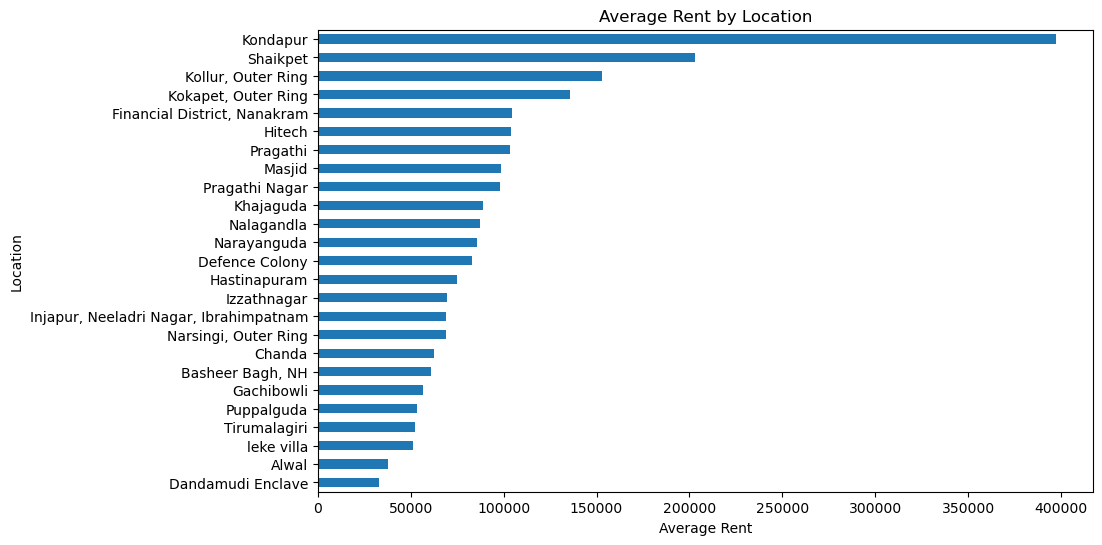

In [248]:
location_rent = df.groupby('Location')['Rent'].mean().sort_values()
plt.figure(figsize=(10, 6))
location_rent.plot(kind='barh')
plt.title('Average Rent by Location')
plt.xlabel('Average Rent')
plt.ylabel('Location')
plt.show()

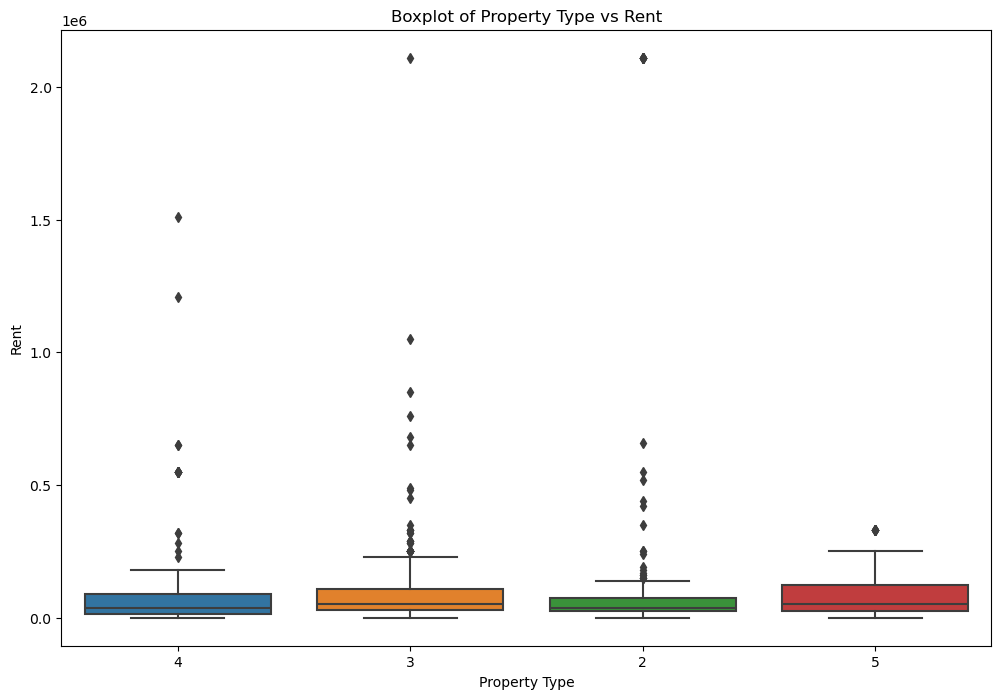

In [249]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Property(BHK)', y='Rent', data=df)
plt.title('Boxplot of Property Type vs Rent')
plt.xlabel('Property Type')
plt.ylabel('Rent')
plt.show()

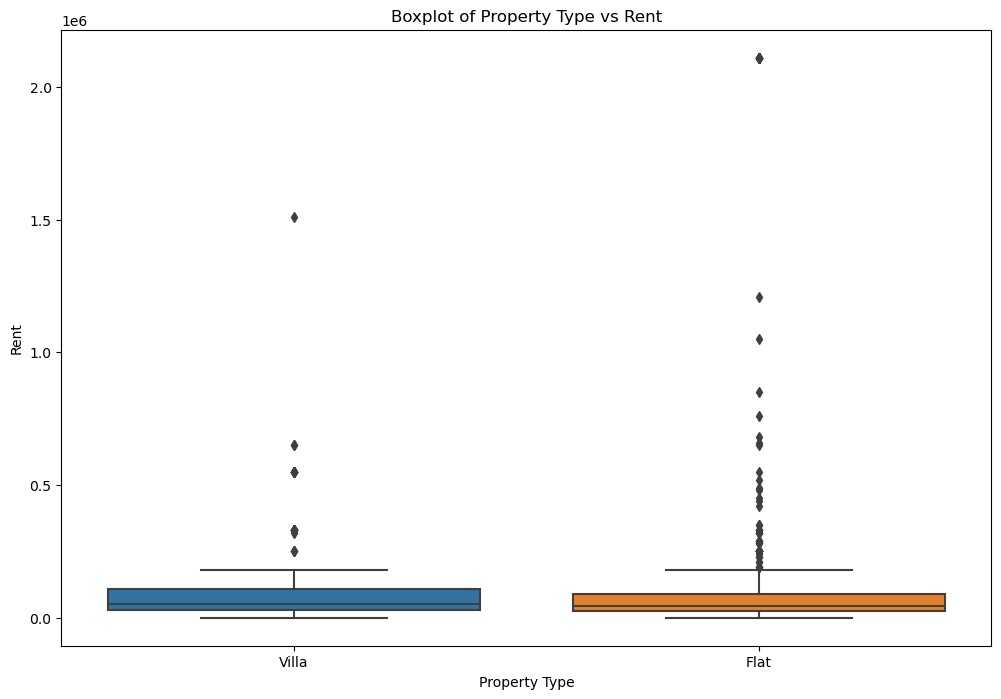

In [250]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Property Type', y='Rent', data=df)
plt.title('Boxplot of Property Type vs Rent')
plt.xlabel('Property Type')
plt.ylabel('Rent')
plt.show()

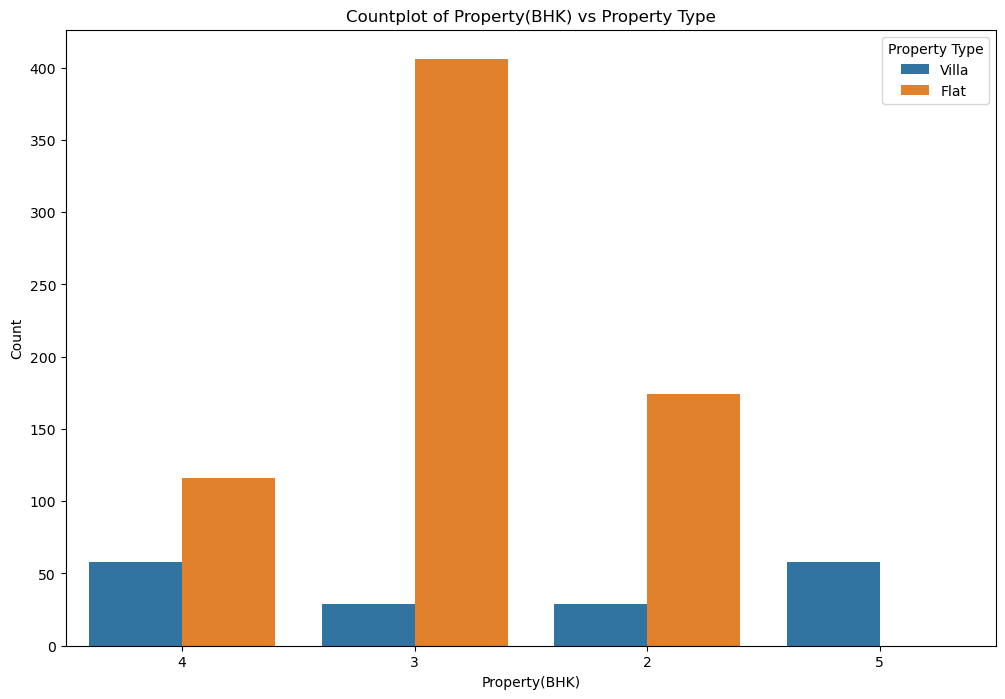

In [251]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Property(BHK)', hue='Property Type', data=df)
plt.title('Countplot of Property(BHK) vs Property Type')
plt.xlabel('Property(BHK)')
plt.ylabel('Count')
plt.show()

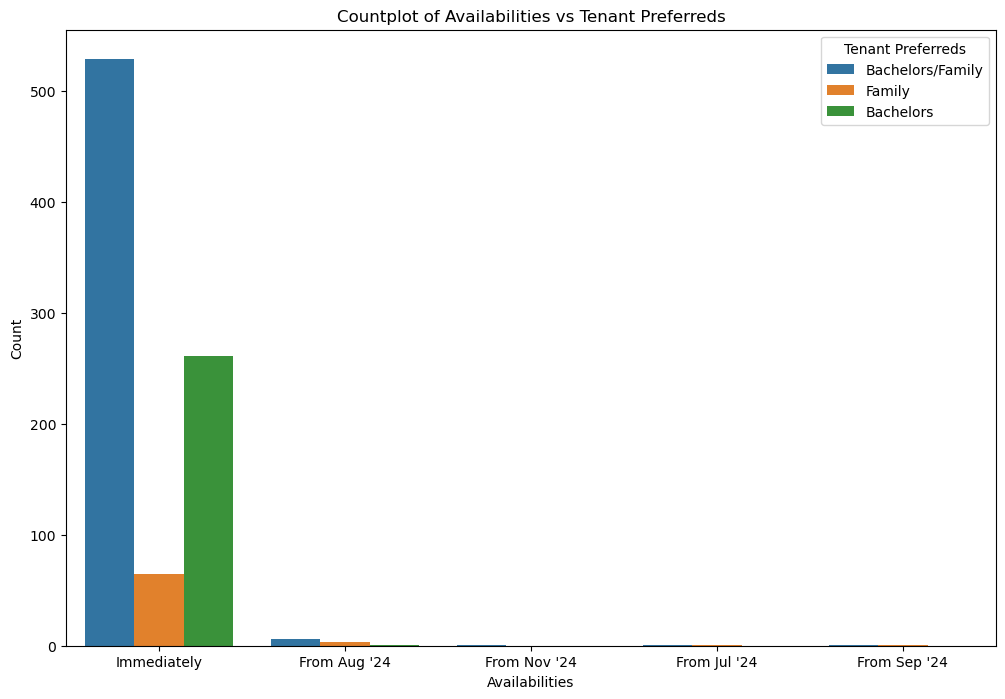

In [252]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Availabilities', hue='Tenant Preferreds', data=df)
plt.title('Countplot of Availabilities vs Tenant Preferreds')
plt.xlabel('Availabilities')
plt.ylabel('Count')
plt.show()

# UNIVARIATE ANALYSIS

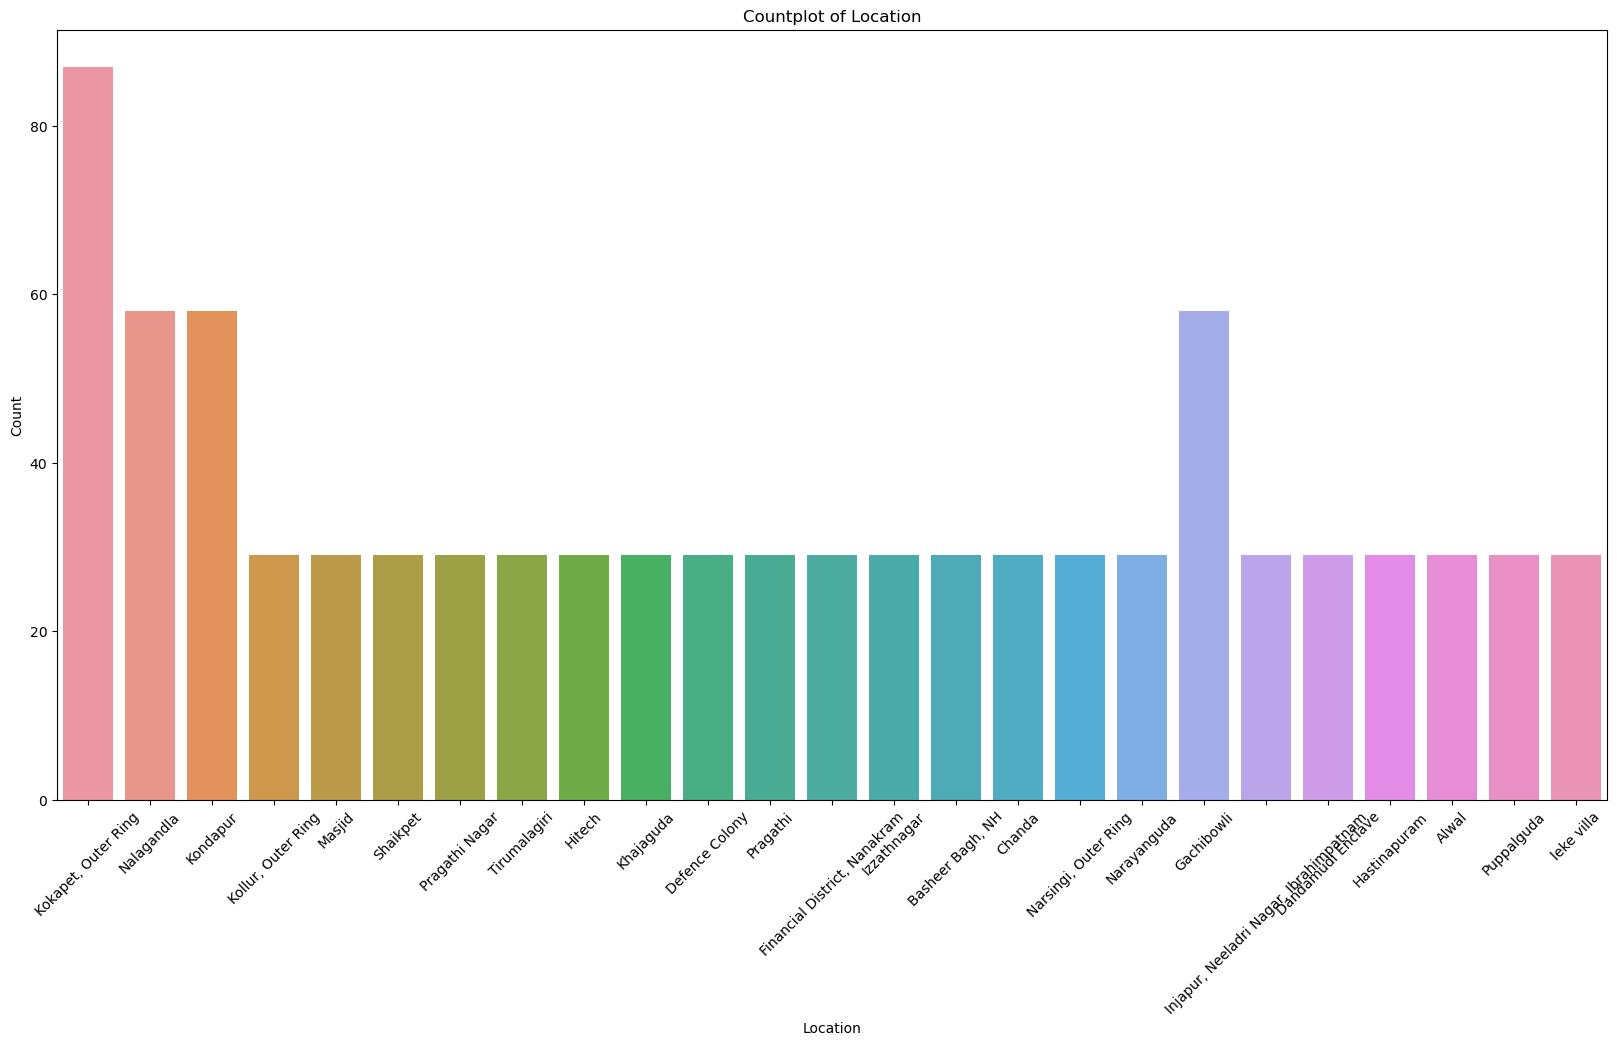

In [253]:
plt.figure(figsize=(20, 10))
sns.countplot(x='Location', data=df)
plt.title('Countplot of Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

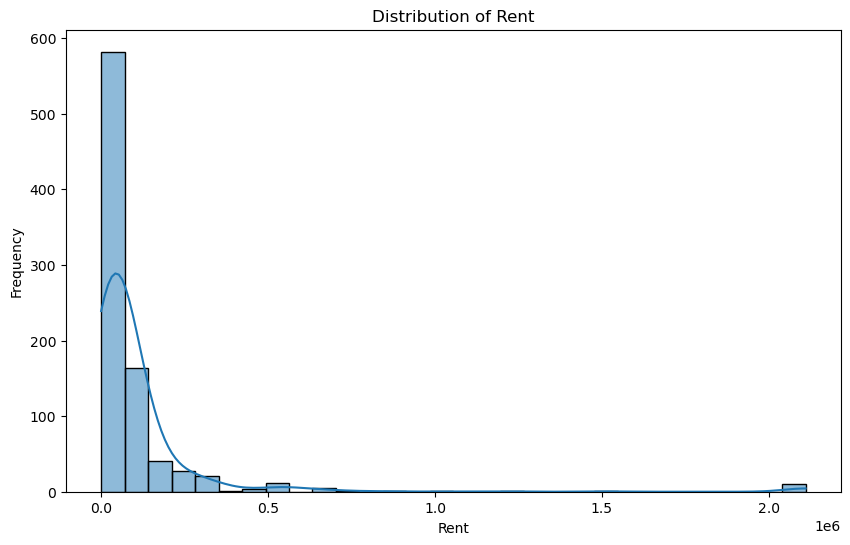

In [254]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Rent'].dropna(), bins=30, kde=True)
plt.title('Distribution of Rent')
plt.xlabel('Rent')
plt.ylabel('Frequency')
plt.show()

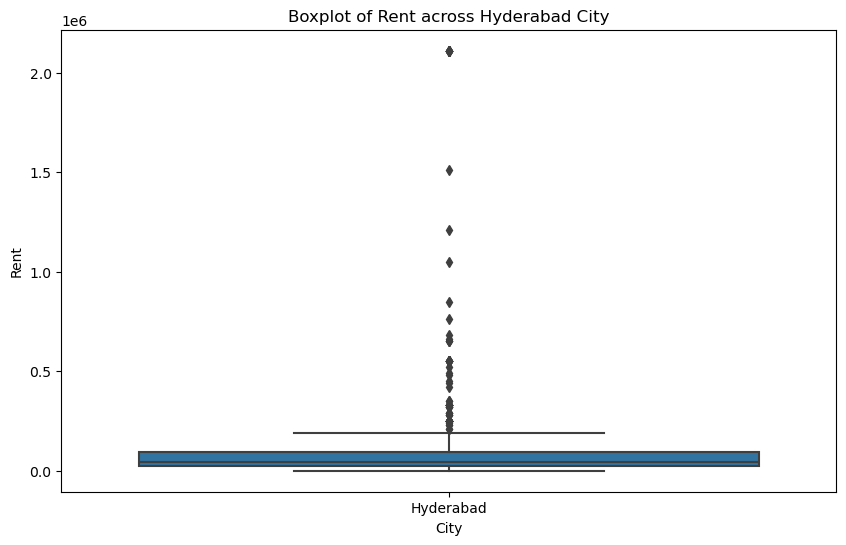

In [255]:
df['City'] = ['Hyderabad'] * len(df)
plt.figure(figsize=(10, 6))
sns.boxplot(x='City', y='Rent', data=df)
plt.title('Boxplot of Rent across Hyderabad City')
plt.xlabel('City')
plt.ylabel('Rent')
plt.show()

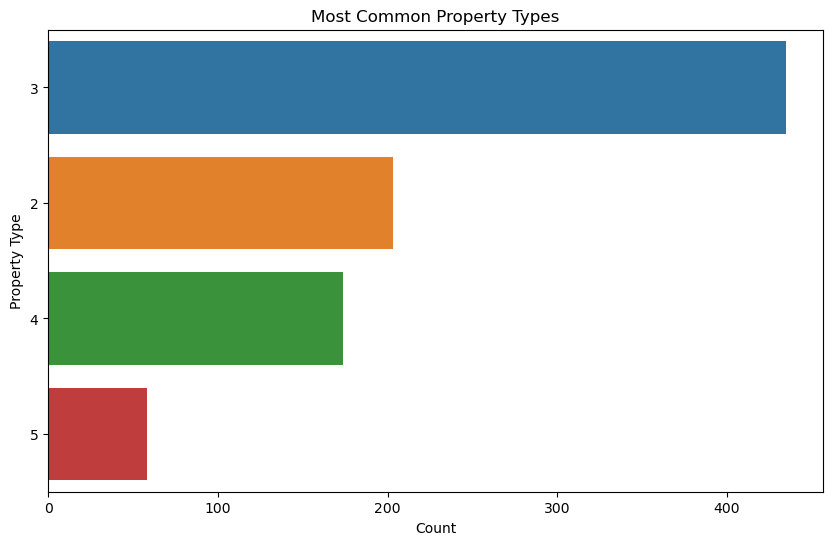

In [256]:
plt.figure(figsize=(10, 6))
sns.countplot(y=df['Property(BHK)'], order=df['Property(BHK)'].value_counts().index)
plt.title('Most Common Property Types')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

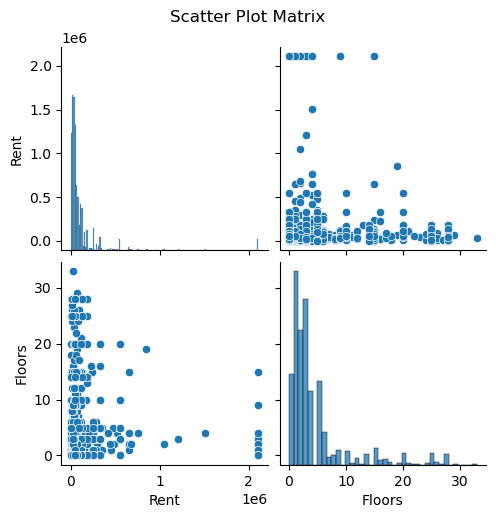

In [257]:
sns.pairplot(df)
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

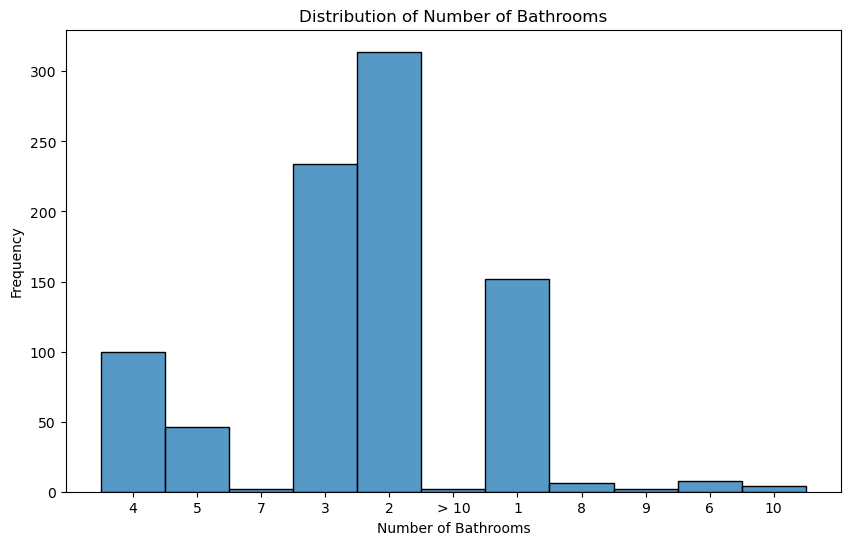

In [258]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Bathrooms'])
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Frequency')
plt.show()

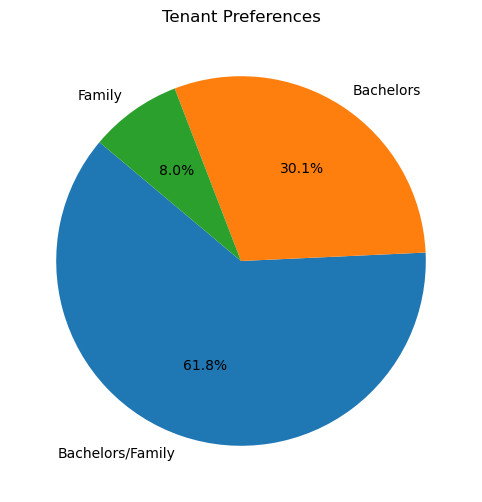

In [259]:
plt.figure(figsize=(10, 6))
tenant_counts = df['Tenant Preferreds'].value_counts()

plt.pie(tenant_counts, labels=tenant_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Tenant Preferences')
plt.title('Tenant Preferences')
plt.show()